<a href="https://colab.research.google.com/github/YeisonsUarez/ParcialApp/blob/master/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar pytorch**

[1]Importar Pytorch y crear un tensor de dimención uno
[2] obtener el tipo de dato que contiene el tensor




In [0]:
import torch 
a= torch.tensor([1,2,3,4])


In [0]:
a.dtype

torch.int64

Convierte el tensor a tipo int32


In [0]:
a= torch.tensor([0.0,1.0,2.0,3.0], dtype=torch.int32)
a.dtype

torch.int32

convierte un tensor de una 1D a 2D llamando al metodo view(filas,columnas)

In [0]:
a_col= a.view(-1,1) 
a_col

tensor([[0],
        [1],
        [2],
        [3]], dtype=torch.int32)

Convetir de numpy a torch y torch a numpy

In [0]:
import numpy as np
numpy_array = np.array([0.0,10.0,20.0,30.0])#crea un tensor con numpy
numpy_torch= torch.from_numpy(numpy_array)# convierte un tensor de numpy a uno de pytorch
torch_numpy= numpy_torch.numpy()#convierte un tensor de pytorch a uno de numpy
torch_numpy

array([ 0., 10., 20., 30.])

**Convertir datos de pandas a tensor de torch**

In [0]:
import pandas as pd
pandas_series= pd.Series([0.1,2,3,0.5,5])
pandas_to_torch= torch.from_numpy(pandas_series.values)
pandas_series

0    0.1
1    2.0
2    3.0
3    0.5
4    5.0
dtype: float64

In [0]:
df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})#dataframe
df

,A,B
0,11,3
1,33,3
2,22,2


In [0]:
dataframe_to_tensor= torch.tensor(df.values)
dataframe_to_tensor

tensor([[11,  3],
        [33,  3],
        [22,  2]])

In [0]:
A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])
A_times_B = torch.mm(A,B)#multiplicación matricial
A_times_B

tensor([[0, 2],
        [0, 2]])

In [0]:
#random
mat1 = torch.randn(2, 3)
mat1

tensor([[-0.2017, -0.3047,  0.1775],
        [-1.1652,  0.5222, -0.2603]])

In [0]:
pandas_to_torch[0] # mostrar el tipo y valor en el indice 0 del tensor 

tensor(0.1000, dtype=torch.float64)

In [0]:
pandas_to_torch[0].item() #mostrar solo el valor del indice cero

0.1

In [0]:
pandas_to_torch[0]= 100 #asignar un valor en el indice del tensor
pandas_to_torch[0]

tensor(100., dtype=torch.float64)

tensor[n:m] obtiene los valores del indice n al indice m-1


In [0]:
sub_tensor= pandas_to_torch[2:4]
sub_tensor

tensor([3.0000, 0.5000], dtype=torch.float64)

Cambia los valores del los indices seleccionados, los valores a asignar deben ser iguales a los campos seleccionados para llenar. Si se agrega un solo valor, se añadira a todos los campos seleccionados

```
# Tiene formato de código
```



In [0]:
pandas_to_torch[2:4]=torch.tensor([400,600])
pandas_to_torch

tensor([100.,   2., 400., 600.,   5.], dtype=torch.float64)

suma el valor el la fila uno, columna uno(3 en el ejemplo) y lo suma con el valor de la fila 2 columna uno. 3f1c1 +5f2c1= 8 

In [0]:
tensor_uno= torch.tensor([3,4])
tensor_dos= torch.tensor([5,6])
tensor_suma= tensor_uno+tensor_dos
tensor_suma

tensor([ 8, 10])

Multiplicación con un escalar


In [0]:
tensor_multiplicador=torch.tensor([3,4,5,6])
escalar_multiplicador= 10
producto= escalar_multiplicador* tensor_multiplicador
producto

tensor([30, 40, 50, 60])

Producto punto entre dos tensores


In [0]:
tensor_uno= torch.tensor([3,4])
tensor_dos= torch.tensor([5,6])
resultado= torch.dot(tensor_uno,tensor_dos)
resultado

tensor(39)

**Metodos Importantes**

In [0]:
Promedio o Media

In [0]:
elementos= torch.tensor([10,50,-1,-5,100], dtype=float)
promedio= elementos.mean()
promedio

tensor(30.8000, dtype=torch.float64)

Valor más alto dentro del tensor

In [0]:
valor_maximo=elementos.max()
valor_maximo

tensor(100., dtype=torch.float64)

Tambien exisen metodos como np.pi(numero PI), torch.sin(x)(seno de un angulo) .size()( tamaño del tensor), .ndimension()(para obtener la dimensión del tensor.

**Tensores bidimencionales**

In [0]:
a=[[11,12,13],[21,21,23],[31,32,33]]
tensor_ejemplo= torch.tensor(a)
tensor_ejemplo

tensor([[11, 12, 13],
        [21, 21, 23],
        [31, 32, 33]])

Metodos

In [0]:
tensor_ejemplo.ndimension() #obtener dimesion del tensor

2

In [0]:
tensor_ejemplo.size() #devuelve el numero de filas y columnas [filas,columnas]

torch.Size([3, 3])

In [0]:
tensor_ejemplo.numel() #numero de elementos

9

In [0]:
tensor_ejemplo[0:3,1] #obtener valores de la 2 columna

tensor([12, 21, 32])

**Derivadas pytorch**

In [0]:
x= torch.tensor(2,requires_grad=True, dtype=float) #añade los valor x=2, True porque tomare el resultado del tensor
y= x**2 # y(x=2)= 2^2  #y(x)= x^2 crea la ecuacion y remplaza valores 
y.backward() #dy(x=2)/dx  = 2x  deviva 
x.grad # muestra el resultado
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2., dtype=torch.float64)
grad_fn: None
grad: tensor(4., dtype=torch.float64)
is_leaf: True
requires_grad: True


**Derivadas Parciales**

In [0]:
u= torch.tensor(1,requires_grad=True, dtype=float)# u=1
v= torch.tensor(2,requires_grad=True, dtype=float) #v=2
f= u*v+u**2 # crea la ecuación y remplaza los valores
f.backward() #derivada parcial (df(u,v)/du  , df(u,v)/dv)
print("valor para u: "+ str(u.grad))
print("valor para v: "+ str(v.grad))


valor para u: tensor(4., dtype=torch.float64)
valor para v: tensor(1., dtype=torch.float64)


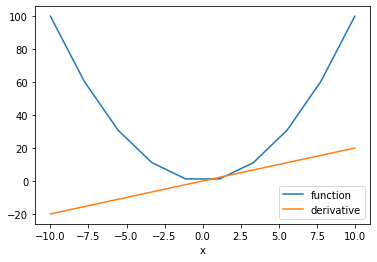

In [0]:
import matplotlib.pylab as plt
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()
